# Patrones estacionales en el consumo de electricidad

In [1]:
import statsmodels as sm
import os
import pandas as pd
from statsmodels.tsa.x13 import x13_arima_analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
plt.style.use("seaborn")

Veamos la evolución del consumo de la electricidad gráficamente:

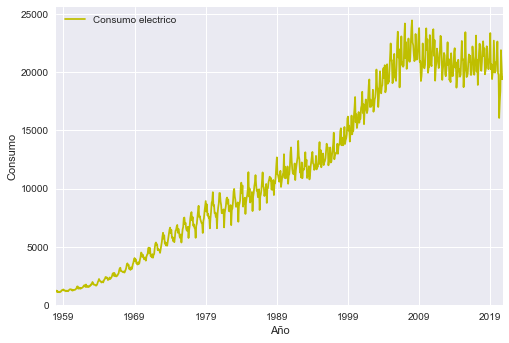

In [2]:
xpath=os.chdir(r"C:/WinX13/x13as")
path="C:/Users/gvizr/Desktop/Informe 2/"
datos=path+"informe-2.xlsx"
df=pd.read_excel(datos, "Hoja1", index_col=0, parse_dates=True)
df.ELECTRIC.plot(color="y", label="Consumo electrico") #veamos la evolución gráficamente
plt.xlabel('Año')
plt.ylabel('Consumo')
plt.legend()
plt.show()

### 1. Comparación de la serie original y la serie ajustada por estacionalidad usando el método de descomposición clásica

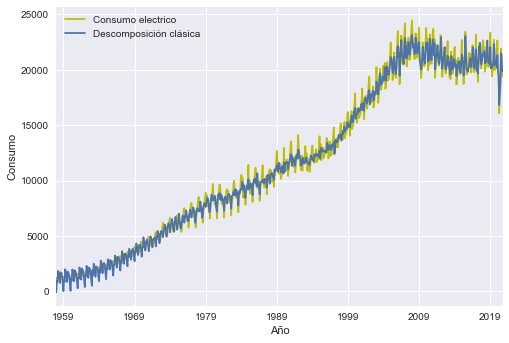

In [3]:
modelo1=seasonal_decompose(df.ELECTRIC, model="additive")
deses1=df.ELECTRIC-modelo1.seasonal
df.ELECTRIC.plot(color="y", label="Consumo electrico")
deses1.plot(label="Descomposición clásica")
plt.xlabel('Año')
plt.ylabel('Consumo')
plt.legend()
plt.show()

Como podemos ver gráficamente, la descomposición clásica se ajusta casi perfectamente a la serie original, sin estar apenas suavizada.

### 2. Comparación de la serie original y la serie ajustada por estacionalidad usando el método de descomposición STL

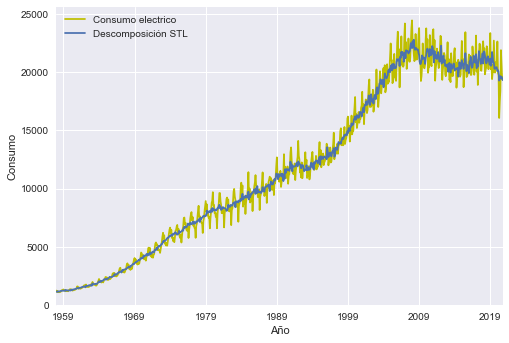

In [4]:
modelo2=STL(df.ELECTRIC, seasonal=5, robust=False).fit()
deses2=df.ELECTRIC-modelo2.seasonal
df.ELECTRIC.plot(color="y", label="Consumo electrico")
deses2.plot(label="Descomposición STL")
plt.xlabel('Año')
plt.ylabel('Consumo')
plt.legend()
plt.show()

En este caso podemos ver que la descomposición STL también se ajusta muy bien a la serie original, además de, estar mucho más suavizada que la clásica.

### 3. Comparación de la serie original y la serie ajustada por estacionalidad usando el método de descomposición X13-ARIMA-SEATS

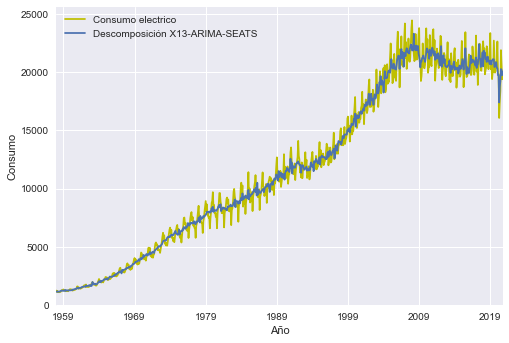

In [5]:
modelo3=x13_arima_analysis(endog=df.ELECTRIC, x12path=xpath, trading=True)

x13output=open(path+"x13output.txt","w")
x13output.write(modelo3.results)
x13output.close()

deses3=modelo3.seasadj
df.ELECTRIC.plot(color="y", label="Consumo electrico")
deses3.plot(label="Descomposición X13-ARIMA-SEATS")
plt.xlabel('Año')
plt.ylabel('Consumo')
plt.legend()
plt.show()

La descomposición X13-ARIMA-SEATS es muy parecida a la descomposición STL, con ciertas diferencias, con ciertos picos mayor pronunciados.

### 4. Cambios en la componente estacional

Primeramente dividiremos la serie en 4 periodos de unos 15 años cada periodo.

In [6]:
split1=df.loc["1958-01":"1973-12"]
split2=df.loc["1974-01":"1988-12"]
split3=df.loc["1989-01":"2003-12"]
split4=df.loc["2004-01":"2020-10"]

La primera división de la serie está compuesta desde el año 1958 hasta 1973:

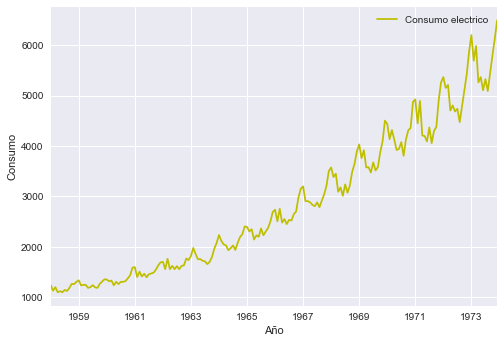

In [7]:
split1.ELECTRIC.plot(color="y", label="Consumo electrico") #veamos la evolución gráficamente
plt.xlabel('Año')
plt.ylabel('Consumo')
plt.legend()
plt.show()

La segunda parte está compuesta desde el 1974 hasta 1988:

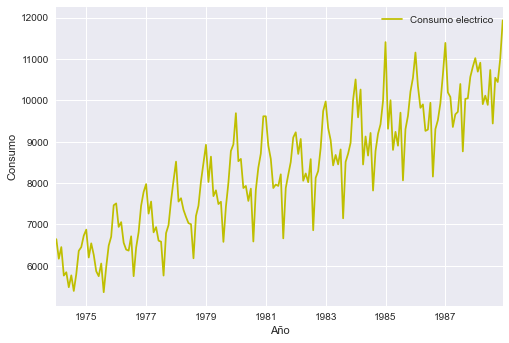

In [8]:
split2.ELECTRIC.plot(color="y", label="Consumo electrico") #veamos la evolución gráficamente
plt.xlabel('Año')
plt.ylabel('Consumo')
plt.legend()
plt.show()

La tercera se compone del año 1989 hasta 2003:

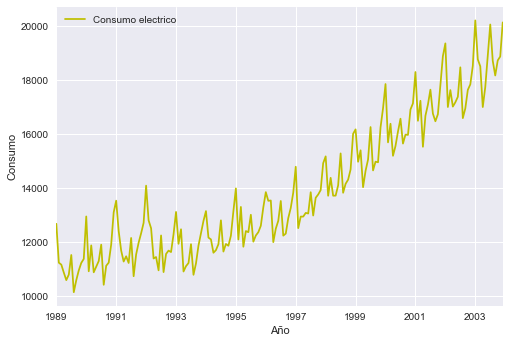

In [9]:
split3.ELECTRIC.plot(color="y", label="Consumo electrico") #veamos la evolución gráficamente
plt.xlabel('Año')
plt.ylabel('Consumo')
plt.legend()
plt.show()

La cuarta y última está compuesta desde el 2004 en adelante:

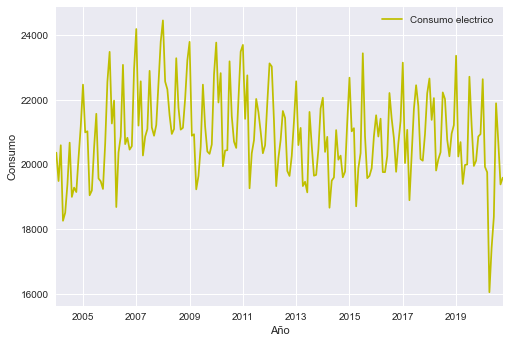

In [10]:
split4.ELECTRIC.plot(color="y", label="Consumo electrico") #veamos la evolución gráficamente
plt.xlabel('Año')
plt.ylabel('Consumo')
plt.legend()
plt.show()

Para estudiar la evolución de las distintas series usaremos la descomposicón STL, eliminando así la componente estacional, para poder analizar de una mejor forma cambios estructurales en los datos.

Empezaremos por orden cronológico, a partir de 1958:

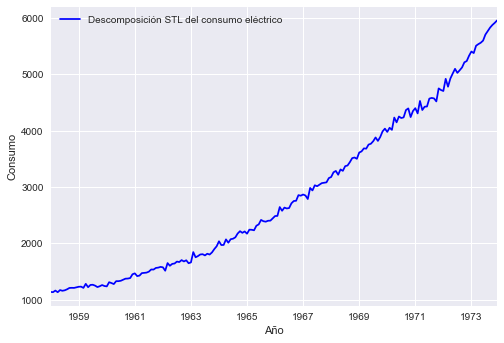

In [11]:
modelo2=STL(split1.ELECTRIC, seasonal=5, robust=False).fit()
deses2=split1.ELECTRIC-modelo2.seasonal
deses2.plot(color="b", label="Descomposición STL del consumo eléctrico")
plt.xlabel('Año')
plt.ylabel('Consumo')
plt.legend()
plt.show()

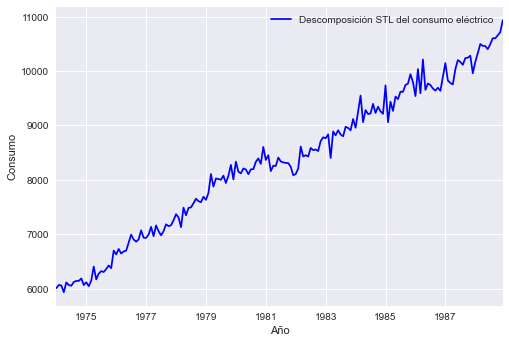

In [12]:
modelo2=STL(split2.ELECTRIC, seasonal=5, robust=False).fit()
deses2=split2.ELECTRIC-modelo2.seasonal
deses2.plot(color="b", label="Descomposición STL del consumo eléctrico")
plt.xlabel('Año')
plt.ylabel('Consumo')
plt.legend()
plt.show()

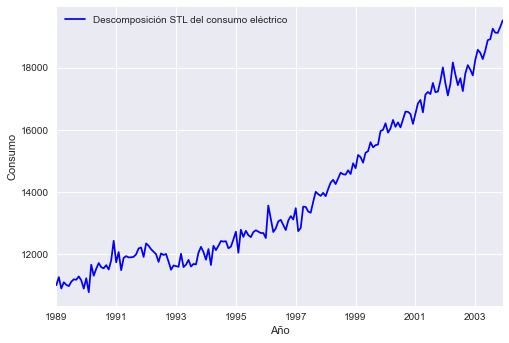

In [13]:
modelo2=STL(split3.ELECTRIC, seasonal=5, robust=False).fit()
deses2=split3.ELECTRIC-modelo2.seasonal
deses2.plot(color="b", label="Descomposición STL del consumo eléctrico")
plt.xlabel('Año')
plt.ylabel('Consumo')
plt.legend()
plt.show()

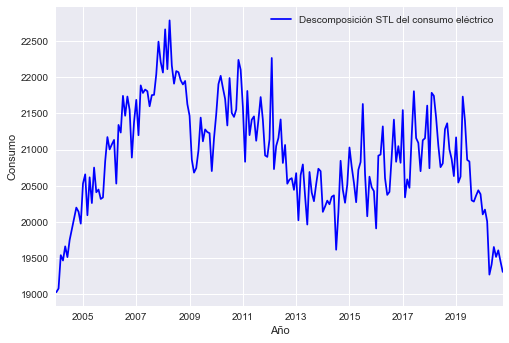

In [24]:
modelo2=STL(split4.ELECTRIC, seasonal=5, robust=False).fit()
deses2=split4.ELECTRIC-modelo2.seasonal
deses2.plot(color="b", label="Descomposición STL del consumo eléctrico")
plt.xlabel('Año')
plt.ylabel('Consumo')
plt.legend()
plt.show()

Viendo la evolución del consumo eléctrico en España tiene (o tenía) una tendencia clara hasta 2008. Así también en los primero años, hasta 1973, la variabilidad del consumo era mínimo, pudiendo deberse a que en aquella época la población en española no disponía de aires acondicionados de forma generalizada, para el invierno si se solía disponer de braseros.

La estacionalidad del consumo se puede empezar a observar más en el segundo periodo y en tercero, donde en ambos se observa mayor variabilidad, con mayores picos en la época más fria del año, por un uso mayor de braseros y disposivos para mantener un ambiente caluroso en invierno dentro del hogar.
Como dato se observa un shock en 1993 como consecuencia de la crisis que se sufrió en dicho año.

Posteriormente, tras el 2008 (año en el que también se observa un shock), se puede observar una estacionalidad más variable aún incluso dentro de un mismo año. Esto quiere decir, que desde dicho año, los hogares españoles han podido disponer de dispositivos con los que se puede mantener un ambiente agradable indistintivamente de si hacía frio o calor, pudiendo deberse a un generalización del aire acondicionado a lo largo de los hogares españoles.